# Multiple, Simple Regression Analysis

In [ ]:
import warnings #경고 제거
warnings.filterwarnings(action='ignore') 

In [14]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('car.csv', header=0, engine='python')

## feature

mpg:
마일 당 갤런(gallon)으로 측정된 자동차의 연비(Miles Per Gallon). 자동차가 얼마나 많은 거리를 갤런 당 얼마나 갈 수 있는지를 나타냅니다.

cylinders:
자동차의 실린더(기통) 수. 일반적으로 자동차의 성능과 연료 효율성에 영향을 미치는 중요한 엔진 특성 중 하나입니다.

displacement:
자동차 엔진의 배기량. 엔진 내의 실린더에서의 피스톤 이동량을 나타내며, 일반적으로 엔진 크기를 나타내는 지표입니다.

horsepower:
자동차 엔진의 출력(마력). 엔진이 얼마나 강력한지를 나타내는 지표로, 높은 마력은 더 강력하고 빠른 차를 나타냅니다.

weight:
자동차의 무게. 자동차의 무게는 주행 성능 및 연비에 영향을 미칠 수 있습니다.

acceleration:
자동차의 가속도. 일반적으로 0에서 60 mph까지의 가속 시간으로 표시되며, 빠른 가속은 주행 성능이 높은 것을 나타냅니다.

model_year:
자동차 모델의 제조 연도. 자동차의 나이를 나타내며, 최신 모델이 일반적으로 최신 기술과 트렌드를 반영할 수 있습니다.

origin:
자동차의 제조 국가 또는 원산지. 자동차가 어느 국가에서 생산되었는지를 나타냅니다.

car_name:
자동차의 모델 또는 브랜드 이름. 자동차의 식별에 사용되는 명칭으로, 각 차량을 유일하게 식별하는 데 사용됩니다.

In [15]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df.head(20)

 데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [ ]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)  
# 독립변수를 하나만 적용하면 단순회귀분석

In [17]:
print(' 데이터세트 크기 : ', data_df.shape)

data_df.head()

 데이터세트 크기 :  (398, 6)


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [23]:
data_df.info()
data_df.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

# Model structure

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [26]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [27]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [28]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [29]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 데이터 분석

MSE (Mean Squared Error): 12.278
MSE는 예측값과 실제값 사이의 평균 제곱 오차를 나타냅니다.
값이 작을수록 모델의 예측이 실제 값과 가깝다는 것을 의미합니다.
여기서는 12.278로 나타났으며, 이는 평균적으로 예측이 실제 값에서 약 12.278만큼 벗어났음을 나타냅니다.

RMSE (Root Mean Squared Error): 3.504
RMSE는 MSE의 제곱근으로, 예측 오차의 평균을 나타냅니다.
값이 작을수록 모델의 예측이 실제 값과 가깝다는 것을 의미합니다.
여기서는 3.504로 나타났으며, 이는 평균적으로 예측이 실제 값에서 약 3.504만큼 벗어났음을 나타냅니다.

R^2 (Variance score): 0.808
R^2는 회귀 모델의 설명력을 나타내는 지표로, 0에서 1 사이의 값을 가집니다.
1에 가까울수록 모델이 종속 변수의 변동을 잘 설명한다는 것을 의미합니다.
여기서는 0.808로 나타났으며, 이는 모델이 전체 데이터의 80.8%의 변동을 설명한다는 것을 의미합니다. 즉, 모델이 어느 정도의 정확성을 가지고 있다고 볼 수 있습니다.

In [30]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [31]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [32]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

# 산점도 + 선형 회귀

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

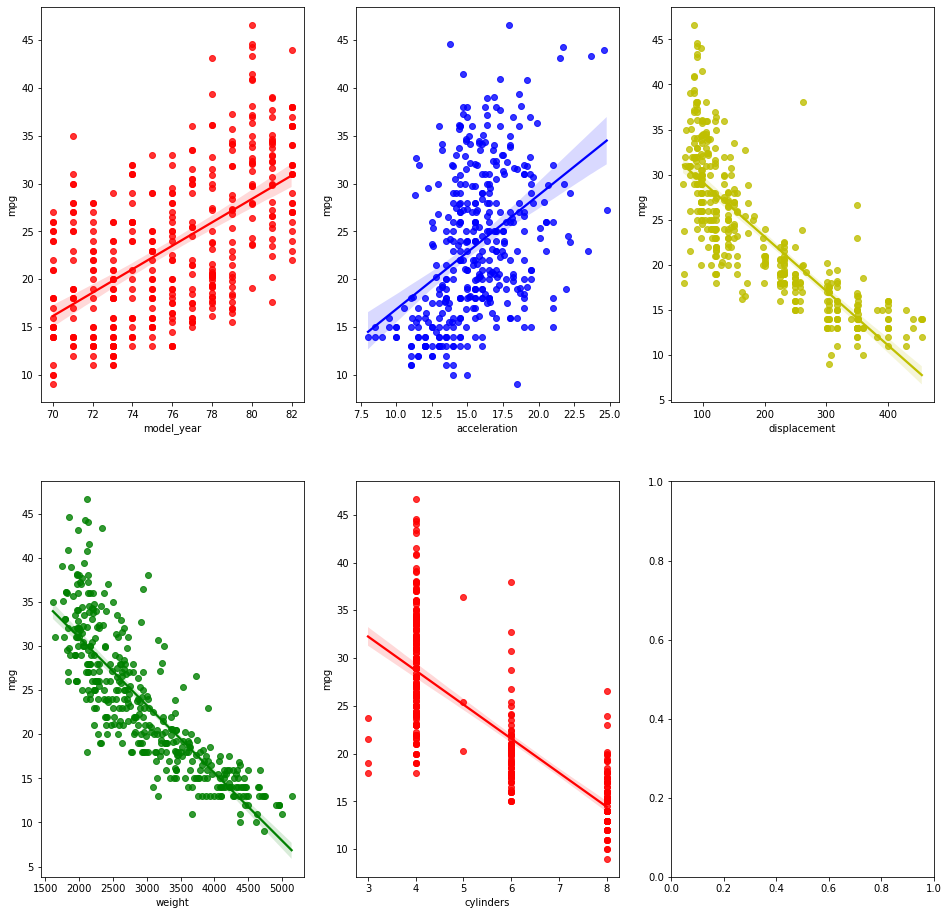

In [34]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

###   <<<< 연비 예측하기  >>>>

In [ ]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

연비를 예측하고 싶은 차의 정보를 입력해주세요.


In [ ]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])

In [ ]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)